In [1]:
!pip install gensim

In [2]:
import sys
from os.path import join, abspath, dirname
from library_code.epubEbook import EpubEbook




In [3]:
book = EpubEbook.from_file('./data/24_fifth_elephant.epub')
paragraphs = []
for _, c in book.chapters:
    paragraphs.extend(c)


OEBPS/part1.xhtml
OEBPS/part10.xhtml
OEBPS/part11.xhtml
OEBPS/part12.xhtml
OEBPS/part13.xhtml
OEBPS/part14.xhtml
OEBPS/part15.xhtml
OEBPS/part16.xhtml
OEBPS/part2.xhtml
OEBPS/part3.xhtml
OEBPS/part4.xhtml
OEBPS/part5.xhtml
OEBPS/part6.xhtml
OEBPS/part7.xhtml
OEBPS/part8.xhtml
OEBPS/part9.xhtml
OEBPS/title.xhtml
titlepage.xhtml


In [4]:
import re
from nltk import tokenize
sentences = []
rex = re.compile(r'\s+')
for p in paragraphs:
    p = p.replace('\n',' ')
    result = rex.sub(' ', p).lower()
    sentences.extend([re.sub(r'^\W+|\W+$','',r).split(' ') for r in tokenize.sent_tokenize(result) if len(r)>3])
data = sentences

In [5]:
from collections import Counter
import itertools
word_counter = Counter( itertools.chain(*sentences))
print(word_counter.most_common(50))

[('the', 5512), ('a', 2996), ('and', 2296), ('of', 2244), ('to', 2178), ('he', 1597), ('was', 1541), ('you', 1501), ('it', 1400), ('said', 1360), ('in', 1335), ('i', 1195), ('that', 1139), ('vimes', 920), ('on', 783), ('his', 781), ('but', 615), ('they', 600), ('at', 594), ('be', 586), ('is', 572), ('had', 570), ('for', 555), ('as', 553), ('there', 523), ('with', 522), ('not', 481), ('were', 468), ('have', 432), ('him', 417), ('this', 416), ('up', 414), ('one', 411), ('all', 407), ('what', 384), ('out', 380), ('your', 374), ('if', 361), ('from', 323), ('like', 310), ('sir', 302), ('an', 298), ('just', 296), ('about', 292), ("it's", 292), ('she', 282), ('are', 280), ('been', 277), ('could', 274), ('me', 269)]


In [6]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.manifold import Isomap
from sklearn.manifold import MDS



In [7]:
# Creating Word2Vec
model = Word2Vec(
    sentences = data,
    vector_size = 50,
    window = 10,
    epochs = 20,
)
 
 
# Finding most similar words
print("3 words similar to vimes")
words = model.wv.most_similar("vimes", topn=5)
for word in words:
  print(word)
print()
 


3 words similar to vimes
('angua', 0.8615036606788635)
('dee', 0.827321469783783)
('gaspode', 0.8129824995994568)
('he', 0.8102606534957886)
('she', 0.7992761135101318)



In [8]:
import pandas as pd
df = pd.read_csv('data/processed/24_fifth_elephant/24_fifth_elephant_people.csv',index_col=[0])
most_interesting = df.T.sum(axis=1).sort_values(ascending=False).head(100).index.values
most_interesting = [m.strip() for m in most_interesting] 
most_interesting_lower = [m.lower() for m in most_interesting]

In [9]:
#Visualizing data

words = list(filter(lambda x: x in model.wv, most_interesting_lower))

X = model.wv[words]

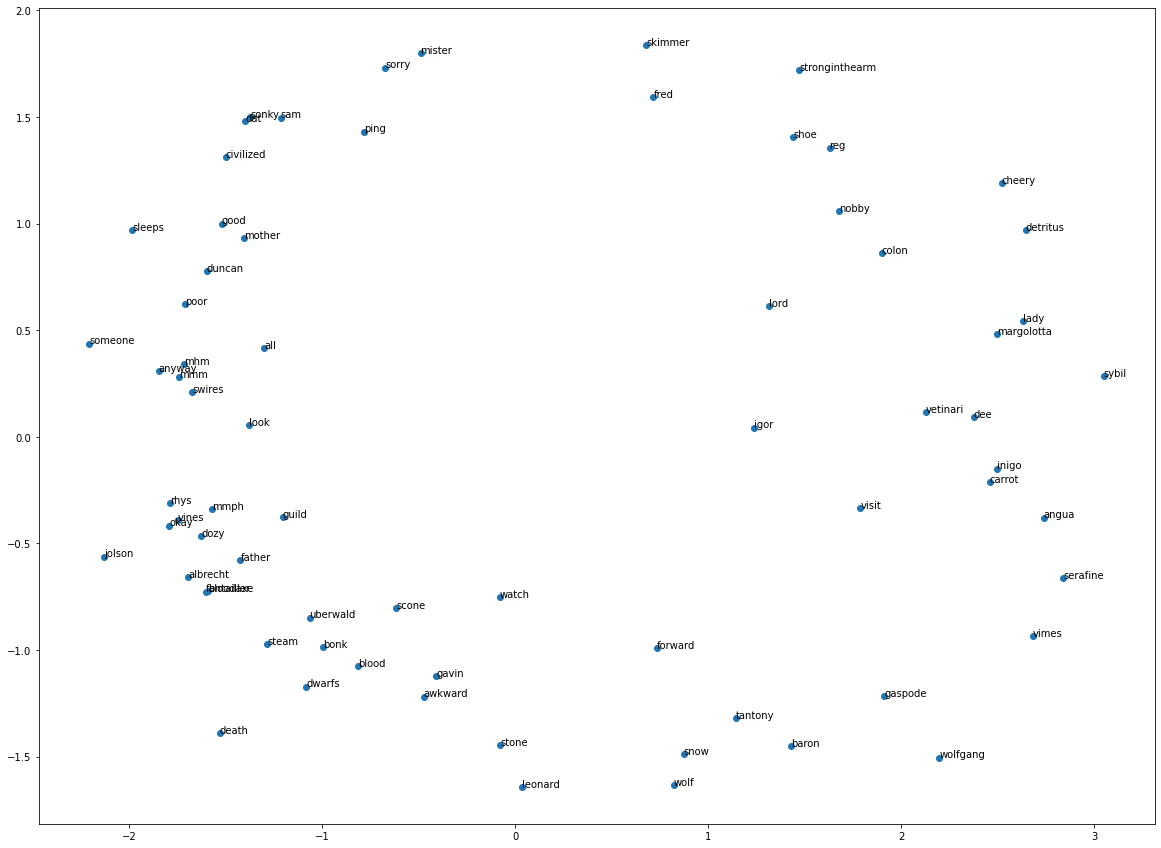

In [10]:
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

scale = StandardScaler()
normalize = Normalizer()
dim_reduction = Isomap()

dim_red_pipe = Pipeline([
    ("scale",scale),
    ("normalize",normalize),
    ("dim_reduction",dim_reduction)]
)

dim_red_pipe.fit(X)
decomposed = dim_red_pipe.transform(X)

fig = pyplot.figure(figsize=(20,15))
ax = pyplot.gca()
ax.scatter(decomposed[:, 0], decomposed[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(decomposed[i, 0], decomposed[i, 1]))
pyplot.show()